# Business Understanding

The goal is to save the new home buyers some time and to help ensure consistency in pricing between new houses on the market and old houses.

The main purpose of this algorithm is predictive, meaning that this model should be able to take in attributes of the King's County dataset that does not yet have a set price, and to predict a good price. The effectiveness of this predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is inferential, meaning that the model should be able to tell us something about the relationship between the attributes of a house in King's County and its price. 

### Analysis Questions

This analysis will seek to answer three questions about the data:

**Question 1:** Which features are most highly correlated with price?

**Question 2:** Which features have the strongest correlations with other predictor variables?

**Question 3:** What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Missing Values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df['waterfront'].isnull().count())
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

21597
2
[nan 'NO' 'YES']
NO     19075
YES      146
Name: waterfront, dtype: int64


In [8]:
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

5
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [9]:
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [10]:
print(df['floors'].nunique())
print(df['floors'].unique())
print(df['floors'].value_counts())

6
[1.  2.  1.5 3.  2.5 3.5]
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


In [11]:
df['yr_renovated'].fillna(0,inplace=True)

In [12]:
df['view'].fillna('NONE', inplace=True)

In [13]:
df['waterfront'].fillna('NO', inplace=True)

In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df["month"] = df["date"].dt.month

In [17]:
 def getSeason(month):
    if (month > 11 or month <= 2):
       return "Winter"
    elif (month >= 3 and month <= 5):
       return "Spring"
    elif (month >=6 and month <= 8):
       return "Summer"
    else:
       return "Fall"

In [18]:
df["season"] = df["month"].apply(getSeason)

In [19]:
print(df['season'].value_counts())

Spring    6518
Summer    6328
Fall      5056
Winter    3695
Name: season, dtype: int64


In [20]:
 def getMonth(month):
    if (month == 1):
       return "January"
    elif (month == 2):
       return "February"
    elif (month == 3):
       return "March"
    elif (month == 4):
       return "April"
    elif (month == 5):
       return "May"    
    elif (month == 6):
       return "June"
    elif (month == 7):
       return "July"    
    elif (month == 8):
       return "August"
    elif (month == 9):
       return "September"
    elif (month == 10):
       return "October"
    elif (month == 11):
       return "November"
    else:
       return "December"

In [21]:
df["month"] = df["month"].apply(getMonth)

In [22]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [23]:
df.sqft_basement = df.sqft_basement.astype('float')

In [24]:
df.floors = df.floors.astype('object')

In [25]:
df.sqft_basement = df.sqft_basement.astype(np.dtype('int64')) #converts column from float to int64, in line with the other similar columns

In [26]:
df.yr_renovated = df.yr_renovated.astype(np.dtype('int64'))

It's advisable to remove the `id` column as keeping it in won't lead to meaningful results.

In [27]:
df.drop(["id"],axis=1, inplace=True)

In [28]:
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols

['floors', 'waterfront', 'view', 'condition', 'grade', 'month', 'season']

In [29]:
df[categorical_cols].nunique()

floors         6
waterfront     2
view           5
condition      5
grade         11
month         12
season         4
dtype: int64

In [30]:
cont_cols = list(df.select_dtypes('number').columns)
cont_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [31]:
df[cont_cols].nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [32]:
df[categorical_cols].head()

,floors,waterfront,view,condition,grade,month,season
0,1,NO,NONE,Average,7 Average,October,Fall
1,2,NO,NONE,Average,7 Average,December,Winter
2,1,NO,NONE,Average,6 Low Average,February,Winter
3,1,NO,NONE,Very Good,7 Average,December,Winter
4,1,NO,NONE,Average,8 Good,February,Winter


### Identifying Categorical Variables

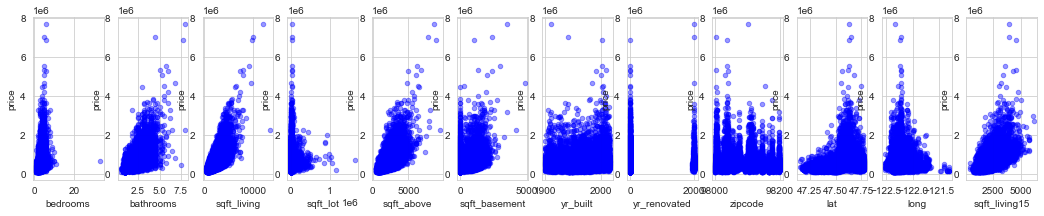

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(18,3))

for xcol, ax in zip(cont_cols[1:14], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

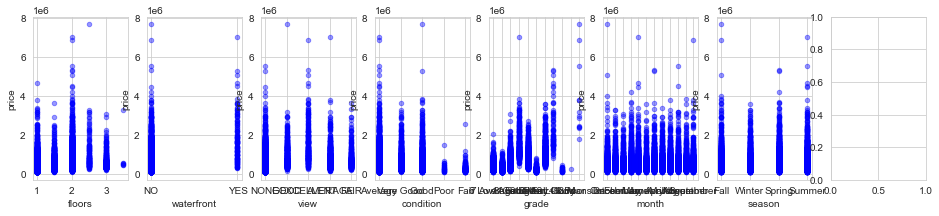

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,3))

for xcol, ax in zip(categorical_cols, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### Interpret a Correlation Heatmap to Build a Baseline Model

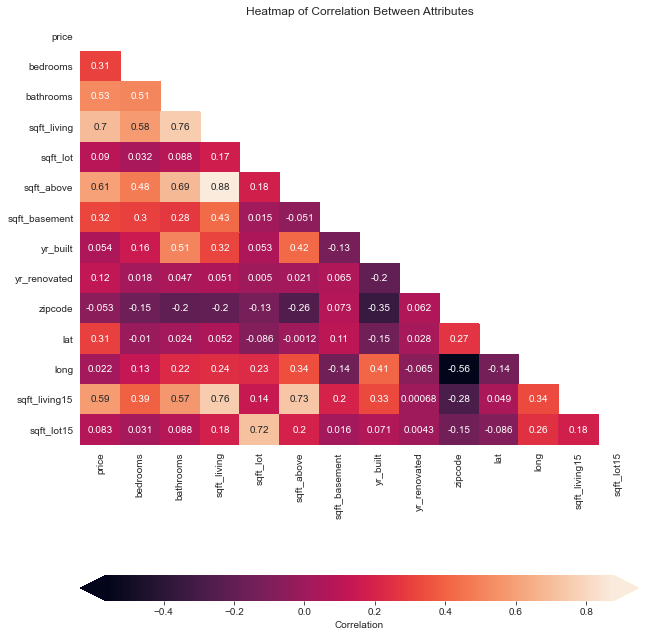

In [35]:
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

According to the heatmap above, `sqft_living` is the most strongly correlated with `price`.

Normal Q-Q Plots are a direct visual assessment of how well our residuals match what we would expect from a normal distribution. In the Q-Q plot above, you can see that residuals are normally distributed for `log_sqft_living`.

#### Which features are most highly correlated with price?

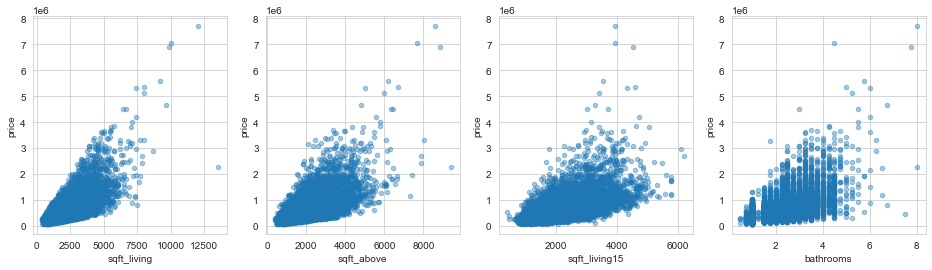

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

for xcol, ax in zip(["sqft_living", "sqft_above", "sqft_living15","bathrooms"], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

### Identifying Multicollinearity

Which features have the strongest correlations with other predictor variables?

In [37]:
df_pred = df.drop(["price"], axis=1)
data=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))

# set index to pairs
data.set_index(['pairs'], inplace = True)

#d rop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
data.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
data.drop_duplicates(inplace=True)

In [38]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


With the variables `sqft_above`, `sqft_living`, `sqft_living15` and `bathrooms` so highly correlated, you would typically remove three of them in order to remove collinear features.

### Train Test Split

In [39]:
y = df["price"]
X = df.drop("price", axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Feature Scaling and Normalization

In [41]:
continuous = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 #'sqft_basement',
 'yr_built',
 #'yr_renovated',
 'lat',
 #'long',
 'sqft_living15',
 'sqft_lot15',
]

In [42]:
#log features
king_cont_train = X_train[continuous]
king_cont_test = X_test[continuous]
log_names = [f'{column}_std' for column in king_cont_train.columns]
king_log_train = np.log(king_cont_train)
king_log_train.columns = log_names
king_log_test = np.log(king_cont_test)
king_log_test.columns = log_names

In [43]:
scaler = StandardScaler()

In [44]:
king_log_train_scaled = scaler.fit_transform(king_log_train)
king_log_test_scaled = scaler.transform(king_log_test)

In [45]:
# one hot encode categoricals
king_ohe_train = pd.get_dummies(X_train[categorical_cols], prefix=categorical_cols, drop_first=True)

king_ohe_test = pd.get_dummies(X_test[categorical_cols], prefix=categorical_cols, drop_first=True)


In [46]:
X_train_1 = pd.concat([pd.DataFrame(king_log_train_scaled, columns=log_names, index=king_ohe_train.index),
                       king_ohe_train], axis=1)
X_test_1 = pd.concat([pd.DataFrame(king_log_test_scaled, columns=log_names, index=king_ohe_test.index),
                      king_ohe_test], axis=1)

In [47]:
y_train_std = (np.log(y_train)-np.mean(np.log(y_train)))/np.std(np.log(y_train))

# 1. Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model:

In [48]:
X_train_concat = pd.concat([X_train, X_train_1],axis=1)

In [49]:
X_test_concat = pd.concat([X_test, X_test_1],axis=1)

In [50]:
rel_col = ['bedrooms', 'yr_built', 'bathrooms', 'sqft_living', 'lat', 'view_EXCELLENT', 'grade_11 Excellent', 'grade_7 Average']

In [51]:
X_train_base = X_train_concat[rel_col]

In [52]:
X_test_base = X_test_concat[rel_col]

In [53]:
linreg1 = LinearRegression(fit_intercept=False)

In [54]:
linreg1.fit(X_train_base, y_train)

LinearRegression(fit_intercept=False)

In [55]:
# Create a model with the training data

model_1 = sm.OLS(y_train, sm.add_constant(X_train_base)).fit()

# show the model summary for the training data
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3679.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:26   Log-Likelihood:            -2.2210e+05
No. Observations:               16197   AIC:                         4.442e+05
Df Residuals:                   16188   BIC:                         4.443e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.408e+07   6.46e+05    -37.299      0.000   -2.53e+07   -2.28e+07
bedrooms           -4.838e+04   2444.084    -19.796      0.000   -5.32e+04   -4.36e+04
yr_built           -2350.4728     70.159    -33.502      0.000   -2487.992   -2212.954
bathrooms           6.868e+04   3866.120     17.764      0.000    6.11e+04    7.63e+04
sqft_living          246.5226      3.302     74.667      0.000     240.051     252.994
lat                 6.047e+05   1.27e+04     47.608      0.000     5.8e+05     6.3e+05
view_EXCELLENT      4.977e+05   1.44e+04     34.655      0.000     4.7e+05    5.26e+05
grade_11 Excellent   3.16e+05   1.37e+04     23.036      0.000    2.89e+05    3.43e+05
grade_7 Average    -4.916e+04   3791.044    -12.969      0.000   -5.66e+04   -4.17e+04
==============================================================================
Omnibus:                    11606.623   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           636484.035
Skew:                           2.873   Prob(JB):                         0.00
Kurtosis:                      33.168   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
linreg1.score(X_train_base, y_train)

0.6146749667221908

In [57]:
linreg1.score(X_test_base, y_test)

0.6046167505909698

In [58]:
y_hat_train_1 = linreg1.predict(X_train_base)
y_hat_test_1 = linreg1.predict(X_test_base)

In [59]:
train_residuals_1 = y_hat_train_1 - y_train
test_residuals_1 = y_hat_test_1 - y_test

In [60]:
train_rmse_1 = mean_squared_error(y_train, y_hat_train_1, squared=False)
test_rmse_1 = mean_squared_error(y_test, y_hat_test_1, squared=False)
print('Train Root Mean Squared Error:', train_rmse_1)
print('Test Root Mean Squared Error:', test_rmse_1)

Train Root Mean Squared Error: 227399.85181540623
Test Root Mean Squared Error: 232908.71034650446


#### Linearity Assumptions

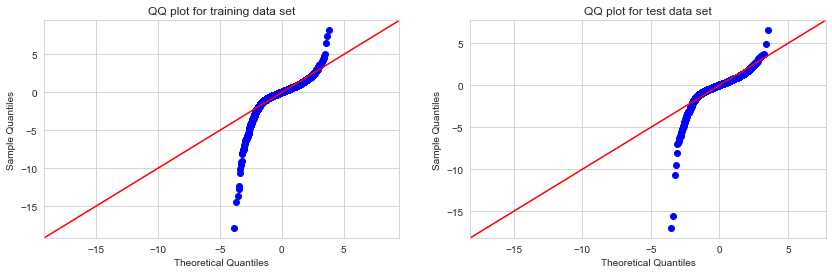

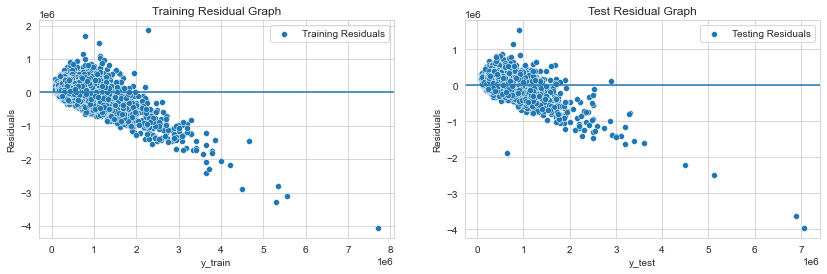

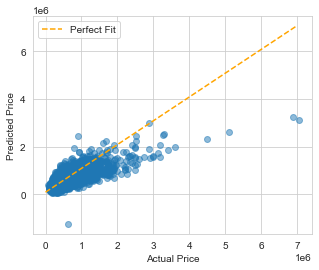

In [61]:
    ## Normality
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sm.graphics.qqplot(train_residuals_1, line='45', fit=True, ax=axs[0])
axs[0].set(title='QQ plot for training data set')
sm.graphics.qqplot(test_residuals_1, line='45', fit=True, ax=axs[1])
axs[1].set(title='QQ plot for test data set')
        
    # Homoscedasticity
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.scatterplot(y_train, train_residuals_1, ax=axs[0], label='Training Residuals')
axs[0].set(title='Training Residual Graph', xlabel='y_train', ylabel='Residuals')
axs[0].axhline(0, label='zero')
sns.scatterplot(y_test, test_residuals_1, ax=axs[1], label='Testing Residuals')
axs[1].set(title='Test Residual Graph', xlabel='y_test', ylabel='Residuals')
axs[1].axhline(0, label='zero')

    # Linearity
fig, ax = plt.subplots(figsize=(5,4))
perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_hat_test_1, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [62]:
coef1 = pd.Series(linreg1.coef_, index=X_train_base.columns, name="Coefficients")
coef1

bedrooms              -57237.762843
yr_built               -3392.005144
bathrooms              92178.033817
sqft_living              249.087781
lat                   141214.792527
view_EXCELLENT        482151.272908
grade_11 Excellent    325219.594302
grade_7 Average       -56554.567580
Name: Coefficients, dtype: float64

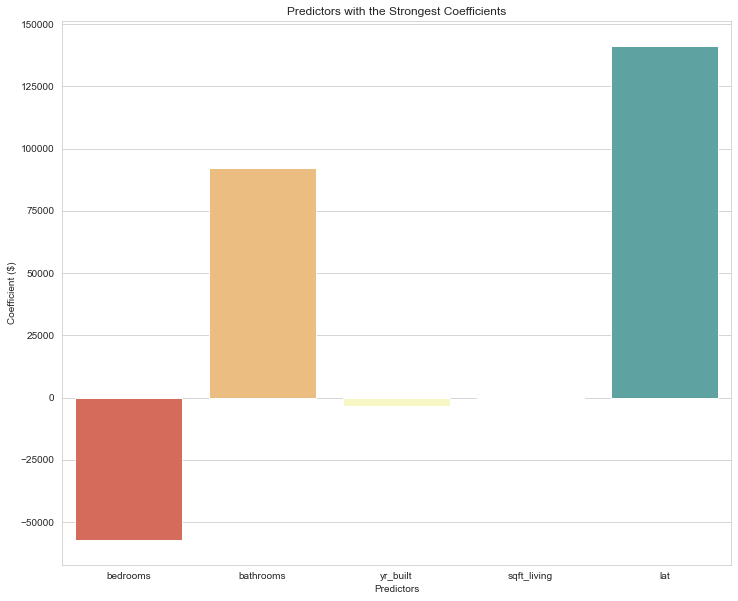

In [63]:
col1 = ["bedrooms", "bathrooms", 'yr_built', "sqft_living", "lat"]
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(coef1[col1].index, coef1[col1].values, palette="Spectral")
plt.xlabel('Predictors')
plt.ylabel('Coefficient ($)')
ax.set(title='Predictors with the Strongest Coefficients');

- The further up north in King County the home is located, the higher the price of the home with a coefficent of \\$141,214 with each increase of latitude
- Each additional square footage of living space in the home is associated with an increase of \\$249 in `price`
- Each additional `bedroom` is associated with a decrease of \\$46,098 in the `price` of a home
- Each additional `bathroom` is associated with an increase of \\$10,629 in the `price` of a home
- The age of the home, `yr_built`, has a negative association with price with a decrease of \\$3,392 per year

# 2. Build a Model with Standardized Numeric Features

Now that we have established a baseline, it's time to move on to more complex models.

In [64]:
cont_relevant = ['bedrooms_std', 'bathrooms_std', 'sqft_living_std', 'sqft_lot_std',
       'sqft_above_std', 'yr_built_std', 'lat_std',
       'sqft_living15_std', 'sqft_lot15_std']

In [65]:
X_train_numeric = X_train_1[cont_relevant]

In [66]:
linreg2 = LinearRegression()

In [67]:
linreg2.fit(X_train_numeric, y_train_std)

LinearRegression()

In [68]:
# Create a model with the training data
model_2 = sm.OLS(y_train_std, sm.add_constant(X_train_numeric)).fit()

# show the model summary for the training data
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     4049.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:39   Log-Likelihood:                -13434.
No. Observations:               16197   AIC:                         2.689e+04
Df Residuals:                   16187   BIC:                         2.696e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.335e-14      0.004   5.36e-12      1.000      -0.009       0.009
bedrooms_std         -0.1246      0.006    -21.420      0.000      -0.136      -0.113
bathrooms_std         0.1364      0.008     17.541      0.000       0.121       0.152
sqft_living_std       0.4243      0.012     36.208      0.000       0.401       0.447
sqft_lot_std         -0.0166      0.011     -1.464      0.143      -0.039       0.006
sqft_above_std        0.1399      0.009     14.952      0.000       0.122       0.158
yr_built_std         -0.2100      0.006    -37.718      0.000      -0.221      -0.199
lat_std               0.3741      0.005     82.096      0.000       0.365       0.383
sqft_living15_std     0.2489      0.007     35.574      0.000       0.235       0.263
sqft_lot15_std       -0.0585      0.011     -5.193      0.000      -0.081      -0.036
==============================================================================
Omnibus:                      372.753   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.694
Skew:                           0.252   Prob(JB):                    7.12e-120
Kurtosis:                       3.748   Cond. No.                         7.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predictions on training and test sets:

In [69]:
y_hat_train_2 = np.exp(linreg2.predict(X_train_numeric) * np.std(np.log(y_train)) + np.mean(np.log(y_train)))
y_hat_test_2 = np.exp(linreg2.predict(X_test_1[cont_relevant]) * np.std(np.log(y_test)) + np.mean(np.log(y_test)))

In [70]:
(linreg2.predict(X_train_numeric) * np.std(y_train)) + np.mean(y_train)

array([ 593881.87245299,  300145.9338781 ,  806378.63360709, ...,
        396533.26178479, -369622.38967655,  931293.31871969])

Calculate training and test residuals:

In [71]:
train_residuals_2 = y_hat_train_2 - y_train
test_residuals_2 = y_hat_test_2 - y_test

Calculate the Root Mean Squared Error (RMSE):

In [72]:
train_rmse_2 = mean_squared_error(y_train, y_hat_train_2, squared=False)
test_rmse_2 = mean_squared_error(y_test, y_hat_test_2, squared=False)
print('Train Root Mean Squarred Error:', train_rmse_2)
print('Test Root Mean Squarred Error:', test_rmse_2)

Train Root Mean Squarred Error: 235324.57661872296
Test Root Mean Squarred Error: 241132.2707230465


In [73]:
linreg2.score(X_test_1[cont_relevant],y_test)

-2.1044274583918083

#### Assumptions:

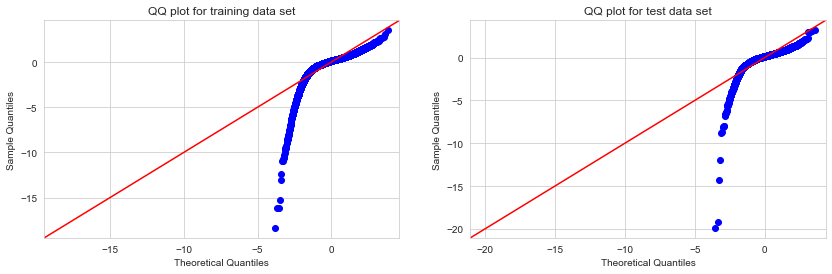

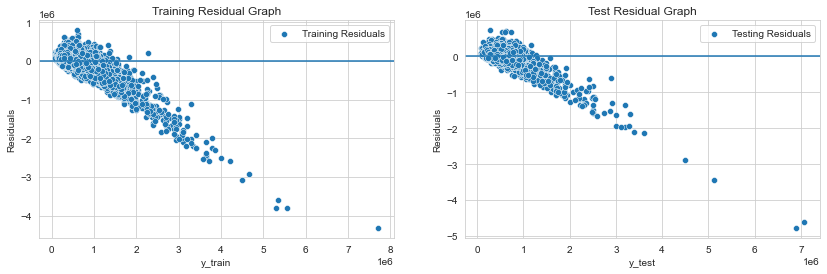

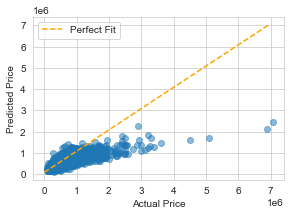

In [74]:
    # Normality
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sm.graphics.qqplot(train_residuals_2, line='45', fit=True, ax=axs[0])
axs[0].set(title='QQ plot for training data set')
sm.graphics.qqplot(test_residuals_2, line='45', fit=True, ax=axs[1])
axs[1].set(title='QQ plot for test data set')
        
    # Homoscedasticity
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.scatterplot(y_train, train_residuals_2, ax=axs[0], label='Training Residuals')
axs[0].set(title='Training Residual Graph', xlabel='y_train', ylabel='Residuals')
axs[0].axhline(0, label='zero')
sns.scatterplot(y_test, test_residuals_2, ax=axs[1], label='Testing Residuals')
axs[1].set(title='Test Residual Graph', xlabel='y_test', ylabel='Residuals')
axs[1].axhline(0, label='zero')

    # Linearity
fig, axs = plt.subplots(figsize=(4.5,3))
perfect_line = np.arange(y_test.min(), y_test.max())
axs.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
axs.scatter(y_test, y_hat_test_2, alpha=0.5)
axs.set_xlabel("Actual Price")
axs.set_ylabel("Predicted Price")
axs.legend();

#### Observations
- Normality:
    - Both training and test results show relatively normal distribution of residuals.
- Homoscedasticity
    - Negative association with relatively uniform width tells us that the model is:
        1. Biased - overestimates lower priced houses
        2. Homoscedastic
- Linearity
    - The values of RMSE and $R^2$ scores are relatively same for both train and test data. 
    - This model has a ***good fit***!
- RMSE and $R^2$ scores
    - The values of RMSE and $R^2$ scores are relatively same for both train and test data. 
    - This model has a ***good fit***!

# 3. Building Final Model

#### Perform Stepwise Selection

In [75]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [76]:
result = stepwise_selection(X_train_1, y_train_std, verbose = True)
print('resulting features:')
print(result)

Add  grade_7 Average                with p-value 0.0
Add  grade_6 Low Average            with p-value 0.0
Add  grade_8 Good                   with p-value 0.0
Add  sqft_above_std                 with p-value 0.0
Add  yr_built_std                   with p-value 0.0
Add  lat_std                        with p-value 0.0
Add  grade_5 Fair                   with p-value 0.0
Add  sqft_living_std                with p-value 0.0
Add  view_NONE                      with p-value 3.16956e-204
Add  grade_9 Better                 with p-value 8.03811e-119
Add  waterfront_YES                 with p-value 5.01593e-102
Add  sqft_living15_std              with p-value 3.66388e-63
Add  bathrooms_std                  with p-value 6.83083e-62
Add  grade_4 Low                    with p-value 8.11651e-53
Add  sqft_lot15_std                 with p-value 1.86656e-36
Add  condition_Very Good            with p-value 6.42944e-35
Add  grade_12 Luxury                with p-value 9.7717e-30
Add  condition_Good      

In [77]:
X_train_final = X_train_1[result]

In [78]:
# Create a model with the training data
model_3 = sm.OLS(y_train_std, sm.add_constant(X_train_final)).fit()

# show the model summary for the training data
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1696.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:51:22   Log-Likelihood:                -10870.
No. Observations:               16197   AIC:                         2.181e+04
Df Residuals:                   16163   BIC:                         2.207e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8329      0.027     30.755      0.000       0.780       0.886
grade_7 Average        -0.9973      0.022    -45.440      0.000      -1.040      -0.954
grade_6 Low Average    -1.2803      0.028    -46.195      0.000      -1.335      -1.226
grade_8 Good           -0.7032      0.020    -35.701      0.000      -0.742      -0.665
sqft_above_std          0.0235      0.010      2.370      0.018       0.004       0.043
yr_built_std           -0.2040      0.006    -35.391      0.000      -0.215      -0.193
lat_std                 0.3468      0.004     86.431      0.000       0.339       0.355
grade_5 Fair           -1.4935      0.044    -34.035      0.000      -1.580      -1.408
sqft_living_std         0.2666      0.011     25.018      0.000       0.246       0.288
view_NONE              -0.2066      0.019    -10.900      0.000      -0.244      -0.169
grade_9 Better         -0.3139      0.020    -15.835      0.000      -0.353      -0.275
waterfront_YES          0.8670      0.055     15.742      0.000       0.759       0.975
sqft_living15_std       0.1388      0.006     21.934      0.000       0.126       0.151
bathrooms_std           0.0844      0.007     12.196      0.000       0.071       0.098
grade_4 Low            -1.7384      0.119    -14.613      0.000      -1.972      -1.505
sqft_lot15_std         -0.0752      0.010     -7.771      0.000      -0.094      -0.056
condition_Very Good     0.2404      0.015     16.049      0.000       0.211       0.270
grade_12 Luxury         0.7700      0.060     12.847      0.000       0.652       0.887
condition_Good          0.1130      0.009     12.044      0.000       0.095       0.131
season_Spring           0.1242      0.010     12.905      0.000       0.105       0.143
bedrooms_std           -0.0500      0.005     -9.715      0.000      -0.060      -0.040
grade_11 Excellent      0.3270      0.032     10.127      0.000       0.264       0.390
grade_13 Mansion        1.4878      0.169      8.795      0.000       1.156       1.819
month_May              -0.0771      0.014     -5.499      0.000      -0.105      -0.050
view_EXCELLENT          0.2700      0.041      6.573      0.000       0.189       0.350
condition_Poor         -0.5072      0.113     -4.490      0.000      -0.729      -0.286
floors_3.0              0.1774      0.027      6.526      0.000       0.124       0.231
floors_2.0              0.0784      0.013      6.184      0.000       0.054       0.103
condition_Fair         -0.1753      0.043     -4.123      0.000      -0.259      -0.092
floors_1.5              0.0680      0.015      4.483      0.000       0.038       0.098
floors_2.5              0.1965      0.046      4.248      0.000       0.106       0.287
view_GOOD               0.1338      0.030      4.401      0.000       0.074       0.193
vie

In [79]:
linreg3 = LinearRegression()
linreg3.fit(X_train_final, y_train_std)

LinearRegression()

In [80]:
y_hat_train_3 = np.exp(linreg3.predict(X_train_final) * np.std(np.log(y_train)) + np.mean(np.log(y_train)))
y_hat_test_3 = np.exp(linreg3.predict(X_test_1[result]) * np.std(np.log(y_test)) + np.mean(np.log(y_test)))

In [81]:
train_residuals_3 = y_hat_train_3 - y_train
test_residuals_3 = y_hat_test_3 - y_test

In [82]:
train_rmse_3 = mean_squared_error(y_train, y_hat_train_3, squared=False)
test_rmse_3 = mean_squared_error(y_test, y_hat_test_3, squared=False)
print('Train Root Mean Squared Error:', train_rmse_3)
print('Test Root Mean Squared Error:', test_rmse_3)

Train Root Mean Squared Error: 183937.4517605561
Test Root Mean Squared Error: 189631.67504135842


- This means that for an average house in King County, this algorithm will be off by about \\$187,067. Given that most homes in King County sold for less than \\$540,296, between May 2014 and May 2015 we would definitely want to have a human double-check and adjust these prices rather than just allowing the algorithm to set them

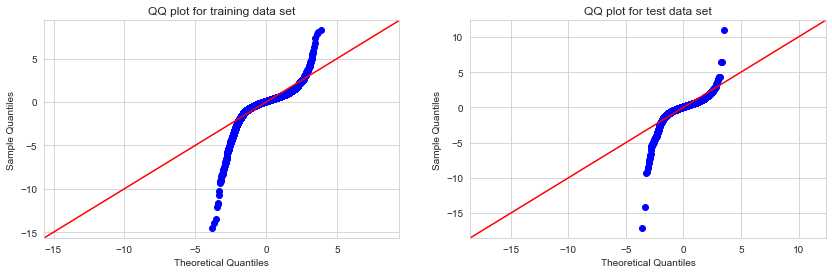

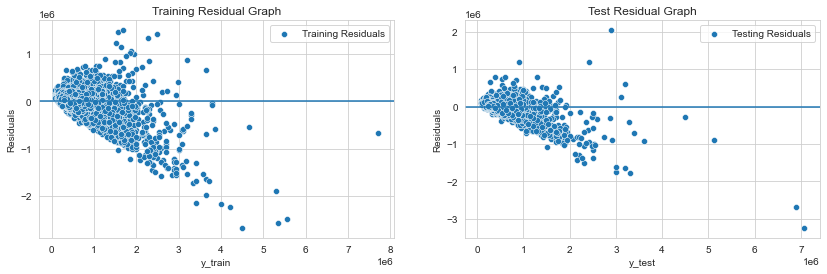

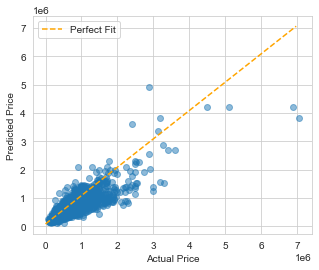

In [83]:
    # Normality
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sm.graphics.qqplot(train_residuals_3, line='45', fit=True, ax=axs[0])
axs[0].set(title='QQ plot for training data set')
sm.graphics.qqplot(test_residuals_3, line='45', fit=True, ax=axs[1])
axs[1].set(title='QQ plot for test data set')
        
    # Homoscedasticity
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.scatterplot(y_train, train_residuals_3, ax=axs[0], label='Training Residuals')
axs[0].set(title='Training Residual Graph', xlabel='y_train', ylabel='Residuals')
axs[0].axhline(0, label='zero')
sns.scatterplot(y_test, test_residuals_3, ax=axs[1], label='Testing Residuals')
axs[1].set(title='Test Residual Graph', xlabel='y_test', ylabel='Residuals')
axs[1].axhline(0, label='zero')

    # Linearity
fig, axs = plt.subplots(figsize=(5,4))
perfect_line = np.arange(y_test.min(), y_test.max())
axs.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
axs.scatter(y_test, y_hat_test_3, alpha=0.5)
axs.set_xlabel("Actual Price")
axs.set_ylabel("Predicted Price")
axs.legend();

#### Observations
- QQ-plots:
    - Both training and test results show relatively normal distribution of residuals.
- Homoscedasticity
    - Negative association with relatively uniform width tells us that the model is:
        1. Biased - overestimates lower priced houses and underestimates higher priced houses.
        2. Homoscedastic
- RMSE and $R^2$ scores
    - The values of RMSE and $R^2$ scores are relatively same for both train and test data. 
    - This model has the ***best fit***!

#### Linearity Assumption

- We have some outliers that are all over the place, but in general it looks like we have a linear relationship (not violating this assumption)

In [84]:
print(pd.Series(linreg3.coef_, index=X_train_final.columns, name="Coefficients"))
#print()
print("Intercept:", linreg3.intercept_)

grade_7 Average       -0.997331
grade_6 Low Average   -1.280316
grade_8 Good          -0.703229
sqft_above_std         0.023467
yr_built_std          -0.204042
lat_std                0.346825
grade_5 Fair          -1.493532
sqft_living_std        0.266629
view_NONE             -0.206640
grade_9 Better        -0.313915
waterfront_YES         0.866981
sqft_living15_std      0.138791
bathrooms_std          0.084379
grade_4 Low           -1.738377
sqft_lot15_std        -0.075192
condition_Very Good    0.240435
grade_12 Luxury        0.769959
condition_Good         0.113025
season_Spring          0.124185
bedrooms_std          -0.050009
grade_11 Excellent     0.326995
grade_13 Mansion       1.487835
month_May             -0.077095
view_EXCELLENT         0.269968
condition_Poor        -0.507190
floors_3.0             0.177412
floors_2.0             0.078437
condition_Fair        -0.175279
floors_1.5             0.067986
floors_2.5             0.196490
view_GOOD              0.133768
view_FAI

## Building a Model with Polynomial Regression

In [85]:
col4 = ['bedrooms', 
        "bathrooms",
        'yr_built', 
        'bathrooms', 
        'sqft_living',
        'lat',
        'view_EXCELLENT', 
        "grade_7 Average", 
        "condition_Very Good",
        "floors_2.5",
        "lat_std",
        "waterfront_YES",
        "season_Spring",
        "floors_2.5",
        "sqft_living_std",
        "sqft_living15_std",
        "view_GOOD",
        "floors_3.0",
        "view_FAIR",
        "grade_9 Better",
        "sqft_above_std",
        "condition_Poor",
        "condition_Very Good",
        "grade_8 Good",'grade_11 Excellent', "grade_12 Luxury"]

In [86]:
X_train_4 = X_train_concat[col4]

In [87]:
X_test_4 = X_test_concat[col4]

In [88]:
linreg4 = LinearRegression().fit(X_train_4, y_train)

In [89]:
# 6th degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_fin = poly.fit_transform(X_train_4)
reg_poly = LinearRegression().fit(X_fin, y_train)

In [90]:
X_fin_test = poly.transform(X_test_4)
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred, squared=False)

164842.6044985737

In [91]:
reg_poly.score(X_fin, y_train)

0.8286931937330813

In [92]:
reg_poly.score(X_fin_test, y_test)

0.8019450321072541

# Data Visualizations

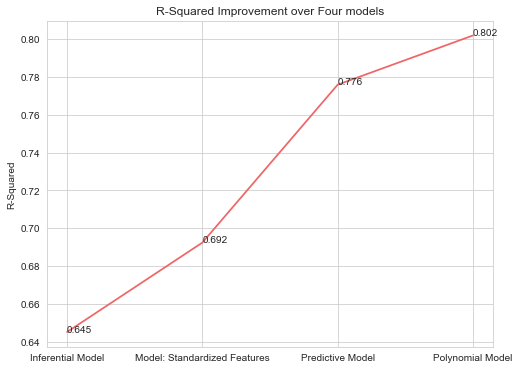

In [93]:
model_improvement={'Inferential Model': model_1.rsquared ,
                   'Standardized Model': model_2.rsquared , 
                   'Predictive Model':model_3.rsquared, 
                   "Polynomial Model" : reg_poly.score(X_fin_test, y_test)}
names = list(model_improvement.keys())
values = list(model_improvement.values())

fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn')


#plt.style.context('seaborn')
ax.plot(names, values, color='#EE6666')
ax.set_ylabel('R-Squared')
ax.set_title('R-Squared Improvement over Four models')
for i,j in zip(names,values):
    ax.annotate(str(round(j,3)),xy=(i,j))

plt.show();

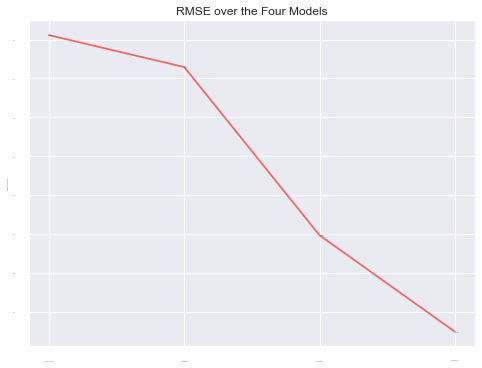

In [107]:
rmse_improvement={'Standardized Model': test_rmse_2 ,
                  'Inferential Model': test_rmse_1 , 
                  'Predictive Model':test_rmse_3, 
                  "Polynomial Model" : mean_squared_error(y_test, y_pred, squared=False)
                 }
names = list(rmse_improvement.keys())
values = list(rmse_improvement.values())

fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn')


#plt.style.context('seaborn')
ax.plot(names, values, color='#EE6666')
#ax.set_ylabel('RMSE')
plt.ylabel('Root Mean Squared Error ($)')
ax.set_title('RMSE over the Four Models')
for i,j in zip(names,values):
    ax.annotate(str(round(j,3)),xy=(i,j))

plt.show();

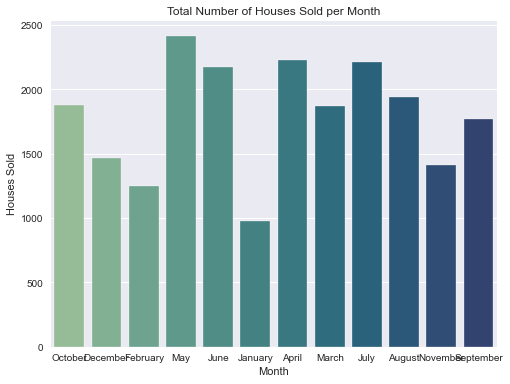

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='month', y='price', estimator = len, data=df, palette="crest")
plt.xlabel('Month')
plt.ylabel('Houses Sold')
ax.set(title='Total Number of Houses Sold per Month');

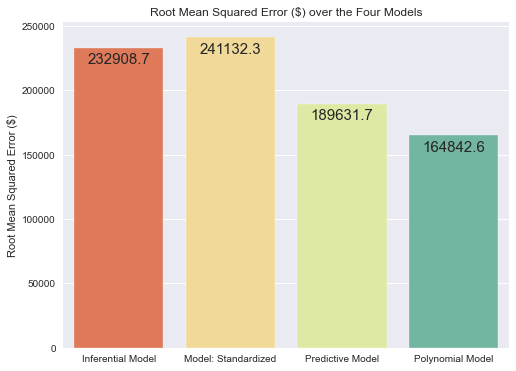

In [96]:
rmse_improvement={'Inferential Model': test_rmse_1 , 
                  'Standardized Model': test_rmse_2 ,
                  'Predictive Model':test_rmse_3, 
                  "Polynomial Model" : mean_squared_error(y_test, y_pred, squared=False)
                 }
names = list(rmse_improvement.keys())
values = list(rmse_improvement.values())

fig, ax = plt.subplots(figsize=(8, 6))
splot = sns.barplot(x=names,
            y=values,
            ax = ax, 
            palette="Spectral")
plt.ylabel('Root Mean Squared Error ($)')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
ax.set(title='Root Mean Squared Error ($) over the Four Models')
plt.show();

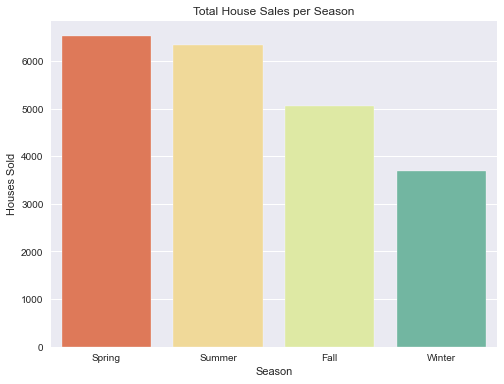

In [97]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='season',
            y='price',
            estimator= len,
            data=df,
            order=['Spring', 'Summer', 'Fall', 'Winter'],
            ax = ax, 
            palette="Spectral")
plt.ylabel('Houses Sold')
plt.xlabel("Season")
ax.set(title='Total House Sales per Season');

In [98]:
microsoft = pd.DataFrame(data={'name':'Microsoft', 'long':-122.1369, 'lat': 47.6423}, index=[1])
downtown_seattle = pd.DataFrame({'name':'Downtown Seattle', 'long':-122.3344, 'lat': 47.6050}, index=[1])
downtown_redmond = pd.DataFrame(data={'name':'Downtown Redmond', 'long':-122.1215, 'lat': 47.6739}, index=[1])
amazon = pd.DataFrame({'name':'Amazon HQ', 'long':-122.3369, 'lat': 47.6229}, index=[1])


In [99]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


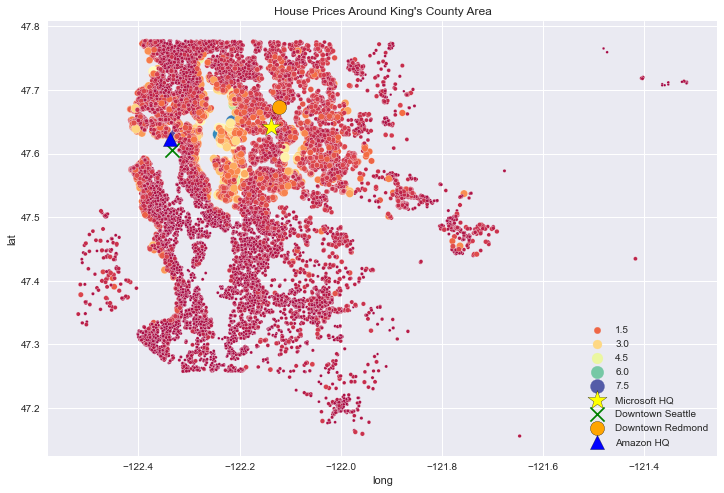

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='long', y='lat', size='price', sizes=(5,200), hue='price', data=df, palette='Spectral')
ax.scatter(x=-122.1369, y=47.6423, marker='*', label='Microsoft HQ', edgecolor='black', color='yellow', s=400)
ax.scatter(x=-122.3344, y=47.6050, marker='x', label='Downtown Seattle', edgecolor='black', color='green', s=200)
ax.scatter(x=-122.1215, y=47.6739, marker='o', label='Downtown Redmond', edgecolor='black', color='orange', s=200)
ax.scatter(x=-122.3369, y=47.6229, marker='^', label='Amazon HQ', edgecolor='black', color='blue', s=200)
plt.legend()
ax.set(title="House Prices Around King's County Area");

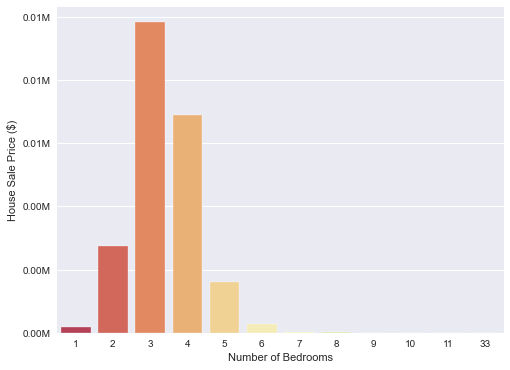

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='bedrooms', 
            y='price', 
            estimator = len, 
            data=df, 
            palette="Spectral"
           )
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Sale Price ($)')
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);

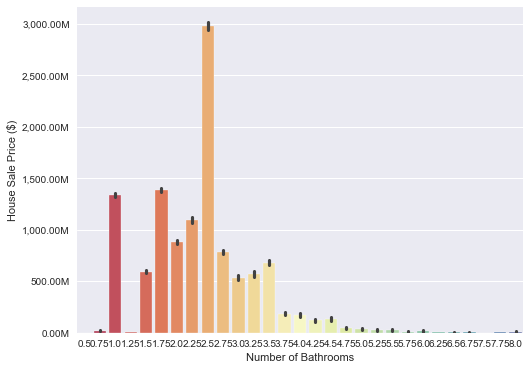

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='bathrooms', y='price', estimator = sum, data=df, palette="Spectral")
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Sale Price ($)')
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);

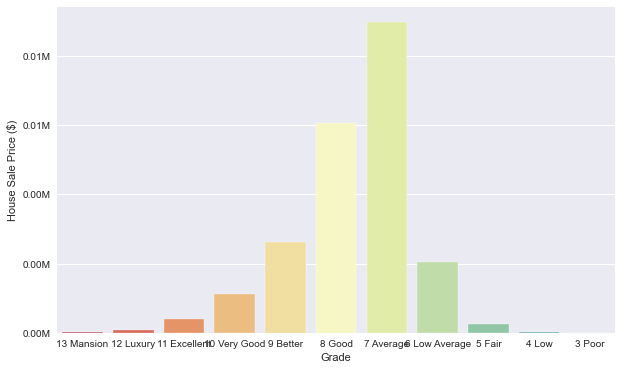

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='grade', y='price', estimator = len, data=df, palette="Spectral",
           order=['13 Mansion', '12 Luxury', '11 Excellent', '10 Very Good', '9 Better', '8 Good','7 Average','6 Low Average', '5 Fair', '4 Low', '3 Poor'])
plt.xlabel('Grade')
plt.ylabel('House Sale Price ($)')
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);

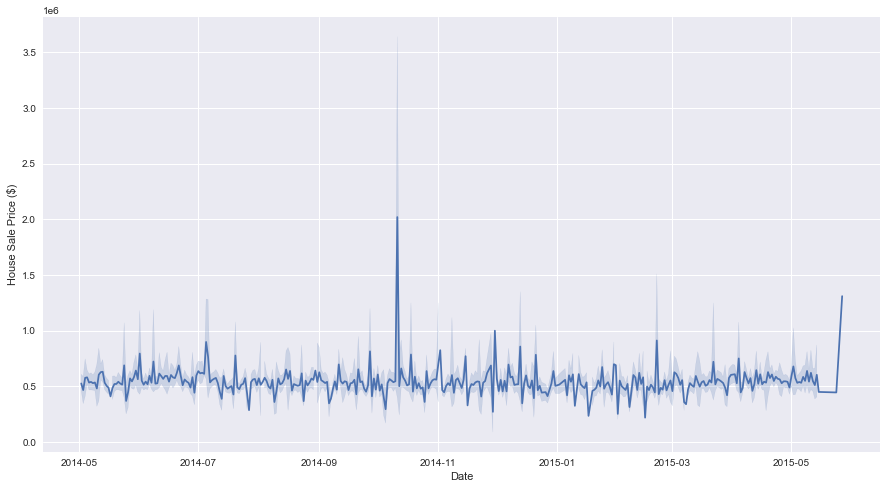

In [104]:
plt.figure(figsize = (15,8))
sns.lineplot(y = df['price'], x  = df['date'])
plt.xlabel('Date')
plt.ylabel('House Sale Price ($)')
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);

Here we can see a strong propotional relationship between the sqft_living_log vs price with a high slope which means that as the living area of house increases, the price will increase dramaticaly.

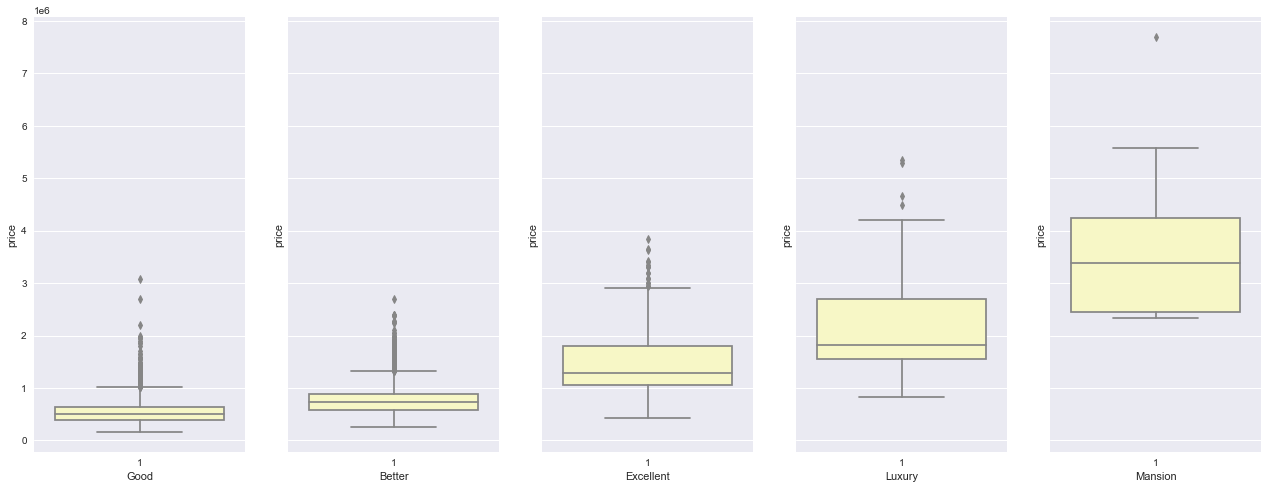

In [105]:
fig, axes = plt.subplots(figsize=(22,8),ncols=5, sharey=True, squeeze=True)
sns.boxplot(data=X_train_final,
                  x=X_train_final[X_train_final['grade_8 Good']==1]['grade_8 Good'],
                  y=y_train, ax=axes[0],palette='Spectral')
sns.boxplot(data=X_train_final,
                  x=X_train_final[X_train_final['grade_9 Better']==1]['grade_9 Better'],
                  y=y_train, ax=axes[1],palette='Spectral')
sns.boxplot(data=X_train_final,
            x=X_train_final[X_train_final['grade_11 Excellent']==1]['grade_11 Excellent'],
            y=y_train, ax=axes[2],palette='Spectral')
sns.boxplot(data=X_train_final,
            x=X_train_final[X_train_final['grade_12 Luxury']==1]['grade_12 Luxury'],
            y=y_train, ax=axes[3],palette='Spectral')
sns.boxplot(data=X_train_final,
            x=X_train_final[X_train_final['grade_13 Mansion']==1]['grade_13 Mansion'],
            y=y_train, ax=axes[4],palette='Spectral')
axes[0].set_xlabel('Good')
axes[1].set_xlabel('Better')
axes[2].set_xlabel('Excellent')
axes[3].set_xlabel('Luxury')
axes[4].set_xlabel('Mansion')
#plt.ylim(-3, 5)
plt.ylabel('price');

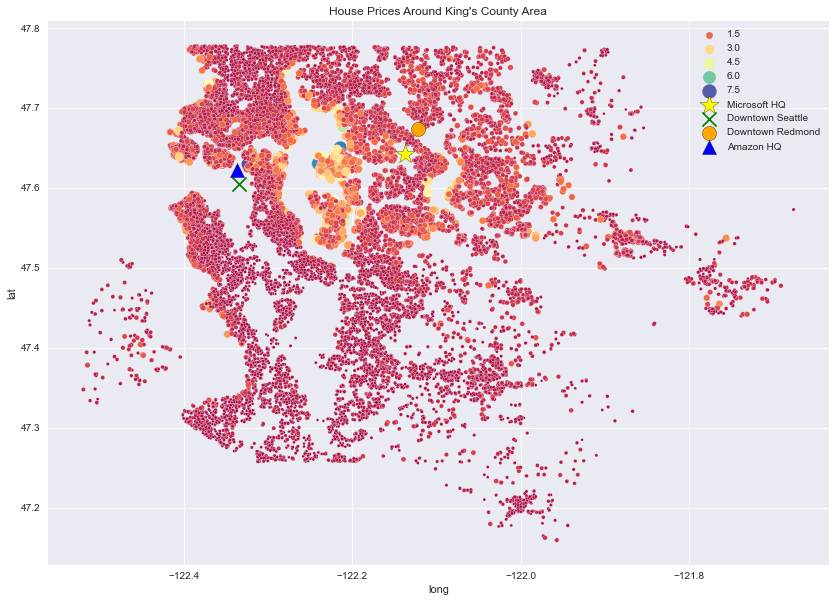

In [106]:
fig, ax = plt.subplots(figsize=(14,10))
sns.scatterplot(x='long', y='lat', size='price', sizes=(5,200), hue='price', data=df[df['long'] < -121.67], palette='Spectral')
ax.scatter(x=-122.1369, y=47.6423, marker='*', label='Microsoft HQ', edgecolor='black', color='yellow', s=400)
ax.scatter(x=-122.3344, y=47.6050, marker='x', label='Downtown Seattle', edgecolor='black', color='green', s=200)
ax.scatter(x=-122.1215, y=47.6739, marker='o', label='Downtown Redmond', edgecolor='black', color='orange', s=200)
ax.scatter(x=-122.3369, y=47.6229, marker='^', label='Amazon HQ', edgecolor='black', color='blue', s=200)
plt.legend()
ax.set(title="House Prices Around King's County Area")
sns.set(font_scale=0)

In [114]:
models_dict = {'Inferential Model': (model_1.rsquared, test_rmse_1), 
               'Standardized Model': (model_2.rsquared, test_rmse_2),
               'Predictive Model':(model_3.rsquared, test_rmse_3), 
               "Polynomial Model" : (reg_poly.score(X_fin_test, y_test), mean_squared_error(y_test, y_pred, squared=False))
                 }

In [115]:
x_error = []
xticklabels = []
y = []

for model_name, model_metric in models_dict.items():
    xticklabels.append(model_name)
    y.append(model_metric[0])
    x_error.append(model_metric[1])

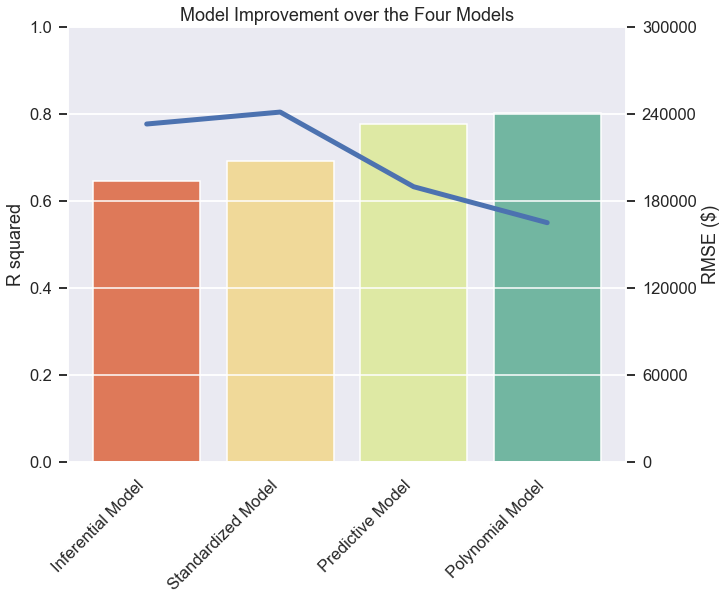

In [122]:
sns.set_style('darkgrid')
#sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=xticklabels, y=y, palette="Spectral")
ax.set(ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax2 = ax.twinx()
sns.lineplot(x=xticklabels, y=x_error, linewidth=5)
ax2.set(ylim=(0, 300000))
ax2.set_yticks(np.linspace(0,300000,num=6))

ax.set_ylabel('R squared')
ax2.set_ylabel('RMSE ($)')
ax.set_title('Model Improvement over the Four Models');